# Problem Statement 4:
Perform the following operations using Python
1. Scan all numeric variables for outliers. If there are outliers, use the following techniques to deal with them. \
a) min max normalization \
b) z-score normalization \
c) Box plot

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("housing.csv")

In [3]:
df

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


In [4]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [5]:
df.tail()

,RM,LSTAT,PTRATIO,MEDV
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0
488,6.030,7.88,21.0,249900.0


In [6]:
len(df)

489

In [7]:
df.shape

(489, 4)

In [8]:
df.size

1956

In [9]:
df.isna()

,RM,LSTAT,PTRATIO,MEDV
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
484,False,False,False,False
485,False,False,False,False
486,False,False,False,False
487,False,False,False,False


In [10]:
df.isna().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

Using boxplot for outliers detection

<AxesSubplot:xlabel='RM'>

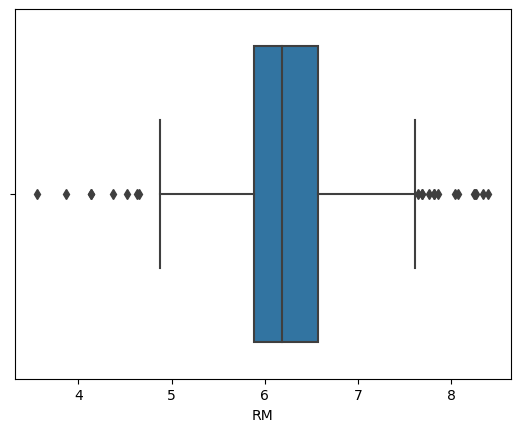

In [11]:
sns.boxplot(data=df, x="RM")

<AxesSubplot:xlabel='LSTAT'>

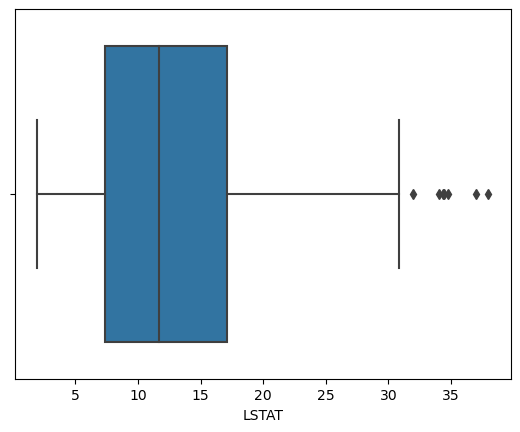

In [12]:
sns.boxplot(data=df, x="LSTAT")

<AxesSubplot:xlabel='PTRATIO'>

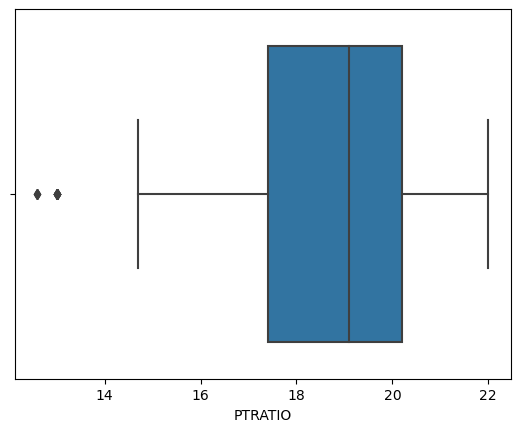

In [13]:
sns.boxplot(data=df, x="PTRATIO")

<AxesSubplot:xlabel='MEDV'>

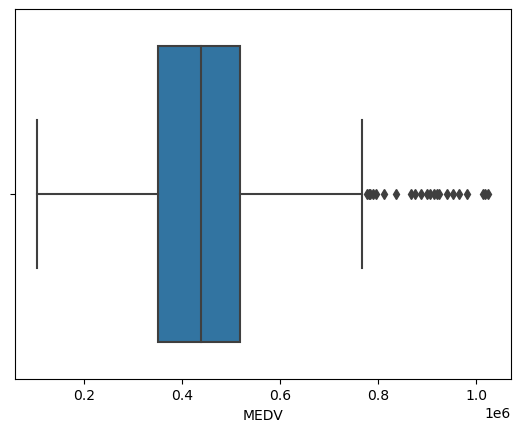

In [14]:
sns.boxplot(data=df, x="MEDV")

Applying Z-Score Normalization to 'RM' Column

In [15]:
df["RM"] = (df["RM"]-df["RM"].mean())/(df["RM"].std())

<AxesSubplot:xlabel='RM'>

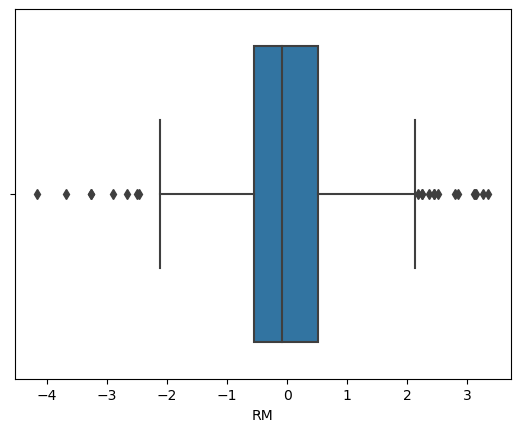

In [16]:
sns.boxplot(data=df, x="RM")

Applying MinMax Normalization on 'LSTAT' column

In [17]:
df['LSTAT'] = (df['LSTAT']-df['LSTAT'].min())/(df['LSTAT'].max()-df['LSTAT'].min())

<AxesSubplot:xlabel='LSTAT'>

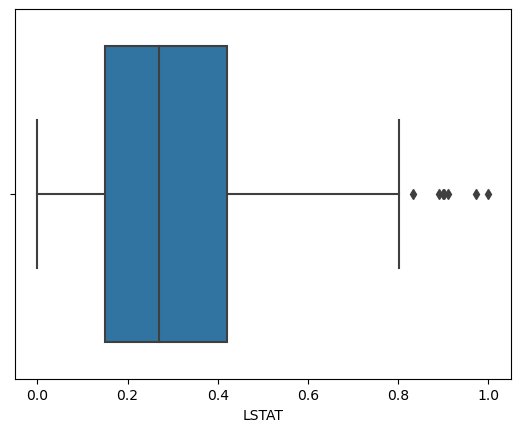

In [18]:
sns.boxplot(data=df, x='LSTAT')

Removing outliers using Boxplot IQR

In [27]:
q1_RM = df["RM"].quantile(q=0.25)
q3_RM = df["RM"].quantile(q=0.75)
iqr_RM = q3_RM - q1_RM

lower_RM = q1_RM - (1.5*iqr_RM)
upper_RM = q3_RM + (1.5*iqr_RM)

df = df[df["RM"]<upper_RM] 
df = df[df["RM"]>lower_RM]
df

,RM,LSTAT,PTRATIO,MEDV
0,0.520021,0.083356,15.3,504000.0
1,0.280761,0.198944,17.8,453600.0
2,1.467742,0.056960,17.8,728700.0
3,1.177211,0.026674,18.7,701400.0
4,1.408703,0.093081,18.7,760200.0
...,...,...,...,...
484,0.547987,0.213670,21.0,470400.0
485,-0.186885,0.197277,21.0,432600.0
486,1.143031,0.101695,21.0,501900.0
487,0.860269,0.125035,21.0,462000.0


In [28]:
len(df)

467

In [29]:
q1_LSTAT = df["LSTAT"].quantile(q=0.25)
q3_LSTAT = df["LSTAT"].quantile(q=0.75)
iqr_LSTAT = q3_LSTAT - q1_LSTAT

lower_LSTAT = q1_LSTAT - (1.5*iqr_LSTAT)
upper_LSTAT = q3_LSTAT + (1.5*iqr_LSTAT)

df = df[df["LSTAT"]<upper_LSTAT] 
df = df[df["LSTAT"]>lower_LSTAT]
df

,RM,LSTAT,PTRATIO,MEDV
0,0.520021,0.083356,15.3,504000.0
1,0.280761,0.198944,17.8,453600.0
2,1.467742,0.056960,17.8,728700.0
3,1.177211,0.026674,18.7,701400.0
4,1.408703,0.093081,18.7,760200.0
...,...,...,...,...
484,0.547987,0.213670,21.0,470400.0
485,-0.186885,0.197277,21.0,432600.0
486,1.143031,0.101695,21.0,501900.0
487,0.860269,0.125035,21.0,462000.0


In [30]:
q1_PTRATIO = df["PTRATIO"].quantile(q=0.25)
q3_PTRATIO = df["PTRATIO"].quantile(q=0.75)
iqr_PTRATIO = q3_PTRATIO - q1_PTRATIO

lower_PTRATIO = q1_PTRATIO - (1.5*iqr_PTRATIO)
upper_PTRATIO = q3_PTRATIO + (1.5*iqr_PTRATIO)

df = df[df["PTRATIO"]<upper_PTRATIO] 
df = df[df["PTRATIO"]>lower_PTRATIO]
df

,RM,LSTAT,PTRATIO,MEDV
0,0.520021,0.083356,15.3,504000.0
1,0.280761,0.198944,17.8,453600.0
2,1.467742,0.056960,17.8,728700.0
3,1.177211,0.026674,18.7,701400.0
4,1.408703,0.093081,18.7,760200.0
...,...,...,...,...
484,0.547987,0.213670,21.0,470400.0
485,-0.186885,0.197277,21.0,432600.0
486,1.143031,0.101695,21.0,501900.0
487,0.860269,0.125035,21.0,462000.0


<AxesSubplot:xlabel='RM'>

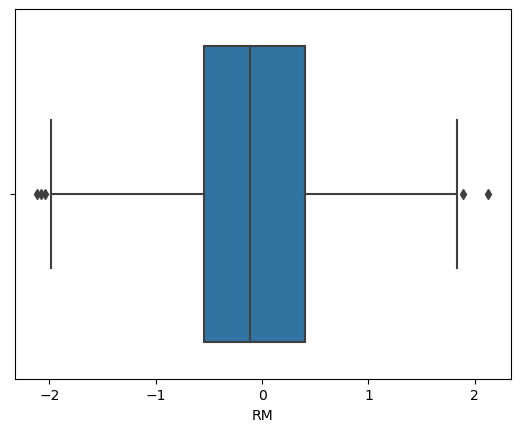

In [31]:
sns.boxplot(data=df, x="RM")

<AxesSubplot:xlabel='LSTAT'>

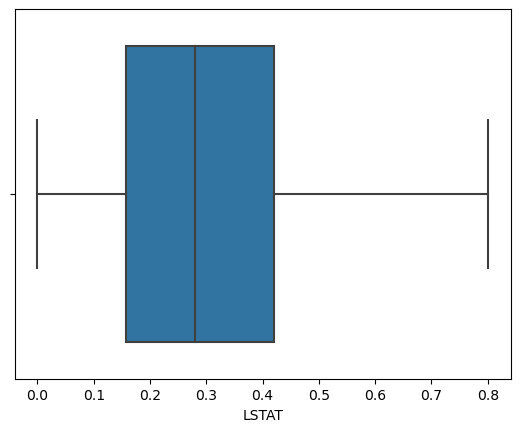

In [32]:
sns.boxplot(data=df, x="LSTAT")

<AxesSubplot:xlabel='PTRATIO'>

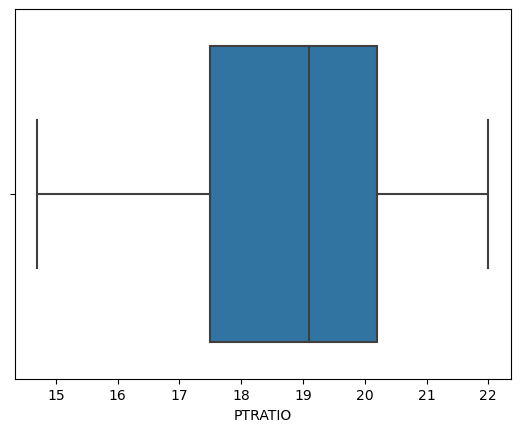

In [34]:
sns.boxplot(data=df, x="PTRATIO")